Analise de Dados do Site PyMeet

Este site aprensenta profissionais da área da psicologia que trabalham com o valor social, por volta de R$30,00 a consulta.

In [1]:
from data.mysqls import BancoDeDados
import pandas as pd
import matplotlib.pyplot as plt
from utils.scraping import PsicologoScraper




Primeiro realizaremos o scraping de dados com o Selenium

In [2]:
PsicologoScraper().scrape()

TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [46]:
def dataframe_estruturado(tabela: str):
    query_colunas = BancoDeDados().retornar_nomes_colunas(tabela)
    lista_colunas = []
    for coluna in query_colunas:
        lista_colunas.append(coluna[0])

    query_dados = BancoDeDados().retornar_dados(tabela)
    return pd.DataFrame(query_dados,columns=lista_colunas)

dados = dataframe_estruturado('psicologos')
sexo = dados['sexo'].value_counts()


In [47]:
dados

,id,nome,telefone,link,sexo
0,1,Josilene Nascimento Silva,(11) 96869-0594,https://www.psymeetsocial.com/psicologo/josile...,F
1,2,Elisabete Itatani Scarabel,(11) 95760-9150,https://www.psymeetsocial.com/psicologo/elisab...,F
2,3,Tayse Maria Gonçalves Nascimento,(86) 99408-1178,https://www.psymeetsocial.com/psicologo/tayse-...,F
3,4,Eveli Salatiel Santos,(11) 94780-7680,https://www.psymeetsocial.com/psicologo/eveli-...,F
4,5,Barbara de Souza Reis,(31) 99769-0546,https://www.psymeetsocial.com/psicologo/barbar...,F
...,...,...,...,...,...
795,796,Aline Silva de Oliveira Farias,(21) 99794-6332,https://www.psymeetsocial.com/psicologo/aline-...,F
796,797,Gleice Fabrício Barbudo Vieira,(18) 98152-2248,https://www.psymeetsocial.com/psicologo/gleice...,F
797,798,Branca Estrella Cardoso,(31) 99686-0149,https://www.psymeetsocial.com/psicologo/branca...,F
798,799,Laurismar Portela,(21) 98154-3892,https://www.psymeetsocial.com/psicologo/lauris...,F


Quando falamos de psicologos, na maioria das vezes pensamos logo em uma profissional do sexo feminino.
Sendo bem perceptível isso quando analizamos o grafico comparando a quantidade de psicologos achados no site PsyMeet

Text(0.5, 1.0, 'Sexo dos psicólogos')

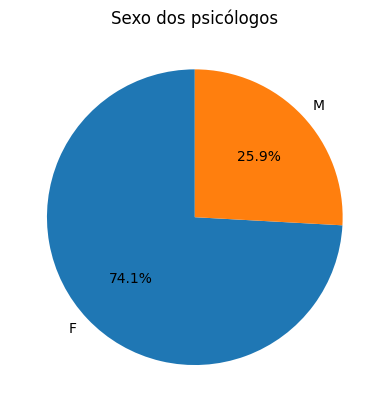

In [48]:
plt.pie(sexo, labels=sexo.index, autopct='%1.1f%%', startangle=90)
plt.title('Sexo dos psicólogos')

Foi seguindo essa tendência que surgiram algumas matérias sobre esse tema, como os seguintes sites:

1)https://amenteemaravilhosa.com.br/mais-mulheres-psicologas/
2)http://pepsic.bvsalud.org/scielo.php?script=sci_arttext&pid=S1414-98931984000100002
3)https://crprn.org.br/noticias/psicologia-uma-profissao-de-muitas-e-diferentes-mulheres/


In [49]:
#quero que obternha os dados de todos os psicologos que o telefone que tenha (83)
data = []
for psi in dados['telefone']:
    if psi[1:3] == '83':
        data.append(psi)
print(dados[dados['telefone'].isin(data)])

      id                                       nome         telefone  \
17    18                 Fladson de Sousa Rodrigues  (83) 99907-3955   
116  117                   Ana Clara Tito de Ataide  (83) 99619-8502   
202  203                       Ailza da Silva Costa  (83) 98708-3243   
288  289                      Camila Roberto Vieira  (83) 99683-3923   
370  371          Mayza Coeli Martins de Figueiredo  (83) 98760-0407   
430  431              Emanuel Victor Cosmo Patriota  (83) 99860-8205   
433  434            Hebert Ramom Alexandre da Silva  (83) 99932-7393   
625  626                    Larissa de Araújo Silva  (83) 99874-4111   
722  723                              Tereza Araújo  (83) 99934-0550   
724  725                       Ícaro da Silva Gomes  (83) 99104-4076   
783  784  Jannielly Aparecida Francisco de Oliveira  (83) 99642-1534   

                                                  link sexo  
17   https://www.psymeetsocial.com/psicologo/fladso...    M  
116  https:

([<matplotlib.patches.Wedge at 0x7fd2f067f950>,
 [Text(-0.8595494953277539, 0.6864216379761084, 'Nordeste'),
  Text(-1.0585944006237968, -0.2989613603259529, 'Norte'),
  Text(-0.8225624503301388, -0.7303362344200637, 'Sul'),
  Text(1.0364110083803213, -0.3685813637558006, 'Sudeste'),
  Text(0.13019821790341268, 1.0922675606529637, 'Centro-Oeste')],
 [Text(-0.4688451792696839, 0.3744118025324228, '28.5%'),
  Text(-0.5774151276129801, -0.1630698329050652, '1.7%'),
  Text(-0.4486704274528029, -0.39836521877458014, '12.7%'),
  Text(0.5653150954801752, -0.20104438023043666, '53.3%'),
  Text(0.07101720976549782, 0.5957823058107075, '3.8%')])

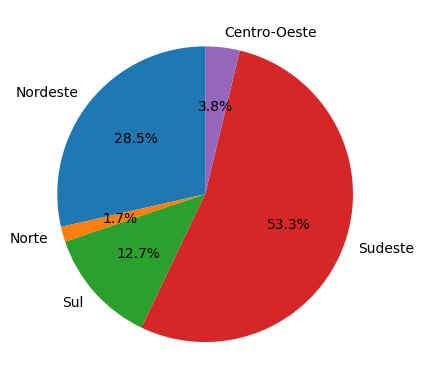

In [87]:
data = [] 
for psi in dados['telefone']:
    data.append(psi[1:3])

dados['ddd'] = data
m = dados

regioes = {'Nordeste': ['81', '82', '83', '84', '85', '86', '87', '88', '89', '71', '73', '74', '75', '77', '79'],
           'Norte': ['91', '92', '93', '94', '95', '96', '97', '98', '99'],
           'Sul': ['41', '42', '43', '44', '45', '46', '47', '48', '49'],
           'Sudeste': ['11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '24', '27', '28'],
           'Centro-Oeste': ['61', '62', '63', '64', '65']}
x = [m[m['ddd'].isin(v)]['ddd'].count() for k, v in regioes.items()]
plt.pie(x, labels=regioes.keys(), autopct='%1.1f%%', startangle=90)

